In [1]:
import numpy as np
import pandas as pd

In [105]:
from scipy import stats

from matplotlib import pyplot as plt

def generate_data(n=100, p=0.2,
									event_distribution='Exponential',
									censoring_distribution='Uniform',
									debug=True,
 									**kwargs):
	"""Generate Synthetic Time-to-Event Data with Censoring.

	Args:
			n (int, optional): Size of the Dataset. Defaults to 100.
			p (float, optional): Probability of Individual in Protected Class. Defaults to 0.2.
			event_distribution (str, optional): Distribution for the Time-to-Event. Defaults to 'Exponential'.
			censoring_distribution (str, optional): Distribution for the Censoring. Defaults to 'Uniform'. If none, data is not censored.
			censoring_scale (float, optional): Scale for the Censoring. Defaults to 5.
	Raises:
			NotImplementedError: _description_
			NotImplementedError: _description_
	"""
	if event_distribution == 'Exponential':
		lambd = kwargs.get('lambd', 1.0)
		t2e_dist = stats.expon()
	elif event_distribution == 'LogNormal':
		raise NotImplementedError()
	elif event_distribution == 'Weibull':
		raise NotImplementedError()
		 
	true_time_2_event = t2e_dist.rvs(size=n)

	subgroup_membership = np.random.binomial(1, p, size=n)

	if censoring_distribution is not None:
		if censoring_distribution == 'Uniform':

			location = kwargs.get('censoring_location', 0.0)
			scale = kwargs.get('censoring_scale', 5.0)
			censoring_dist = stats.uniform(location, location+scale)
		else:
			raise NotImplementedError()

		censoring_times = censoring_dist.rvs(size=n)
		censored_survival_time = np.minimum(true_time_2_event, censoring_times)
		censoring_indicator = censoring_times>true_time_2_event 

	if debug:

		x = np.linspace(0, 10, 1000)	

		plt.figure(figsize=(8*2,6*3))
		plt.subplots_adjust(wspace = 0.15, hspace = 0.25)

		plt.subplot(3, 2, 1)
		plt.title("True Time-to-Event (pdf)", fontsize=18)
		plt.hist(true_time_2_event, bins=20, alpha=0.25, density=True)
		plt.plot(sorted(true_time_2_event), t2e_dist.pdf(sorted(true_time_2_event)), lw=2 )
		plt.legend(loc='best', frameon=False)
		plt.xlim(0, None)
		plt.ylim(0, None)
		plt.grid(ls=':')
#		plt.show()

		plt.subplot(3, 2, 2)
		plt.title("True Time-to-Event (sf)", fontsize=18)
		n, bins, _ = plt.hist(true_time_2_event, bins=20, alpha=0.25, density=True, cumulative=True)
		print(n)
		print(bins)

		plt.plot(x, t2e_dist.sf(x), lw=2)
		plt.legend(loc='best', frameon=False)
		plt.xlabel("Time in Years", fontsize=16)
		plt.ylabel("Censoring Probability", fontsize=16)
		plt.xlim(0, None)
		plt.ylim(0, None)
		plt.grid(ls=':')
		#plt.show()
		
		plt.subplot(3, 2, 3)
		plt.title("True Censoring Event (pdf)", fontsize=18)
		plt.plot(x, censoring_dist.pdf(x), lw=2)
		plt.legend(loc='best', frameon=False)
		plt.xlabel("Time in Years", fontsize=16)
		plt.ylabel("Censoring Probability", fontsize=16)
		plt.xlim(0, None)
		plt.ylim(0, None)
		plt.grid(ls=':')
		#plt.show()

		plt.subplot(3, 2, 4)
		plt.title("True Censoring Event (sf)", fontsize=18)
		plt.plot(x, censoring_dist.sf(x), lw=2)
		plt.legend(loc='best', frameon=False)
		plt.xlabel("Time in Years", fontsize=16)
		plt.ylabel("Censoring Probability", fontsize=16)
		plt.xlim(0, None)
		plt.ylim(0, None)
		plt.grid(ls=':')
		#plt.show()

		from lifelines import KaplanMeierFitter, NelsonAalenFitter
		if censoring_distribution is not None:
			plt.subplot(3, 2, 5)
			plt.title("Kaplan-Meier Survival Estimate", fontsize=18)
			KaplanMeierFitter().fit(censored_survival_time, censoring_indicator).plot()
			plt.xlabel("Time in Years", fontsize=16)
			plt.ylim(0, None)
			plt.xlim(0, None)
			plt.grid(ls=':')

			plt.subplot(3, 2, 6)
			plt.title("Nelson-Aalen Hazard Estimate", fontsize=18)
			NelsonAalenFitter().fit(censored_survival_time, censoring_indicator).plot()
			plt.xlabel("Time in Years", fontsize=16)
			plt.ylim(0, None)
			plt.xlim(0, None)
			plt.grid(ls=':')

		plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.31  0.51  0.657 0.745 0.82  0.879 0.917 0.941 0.959 0.968 0.976 0.979
 0.984 0.987 0.993 0.994 0.998 0.999 0.999 1.   ]
[3.76326583e-04 3.70756183e-01 7.41136039e-01 1.11151590e+00
 1.48189575e+00 1.85227561e+00 2.22265546e+00 2.59303532e+00
 2.96341518e+00 3.33379503e+00 3.70417489e+00 4.07455474e+00
 4.44493460e+00 4.81531446e+00 5.18569431e+00 5.55607417e+00
 5.92645403e+00 6.29683388e+00 6.66721374e+00 7.03759359e+00
 7.40797345e+00]


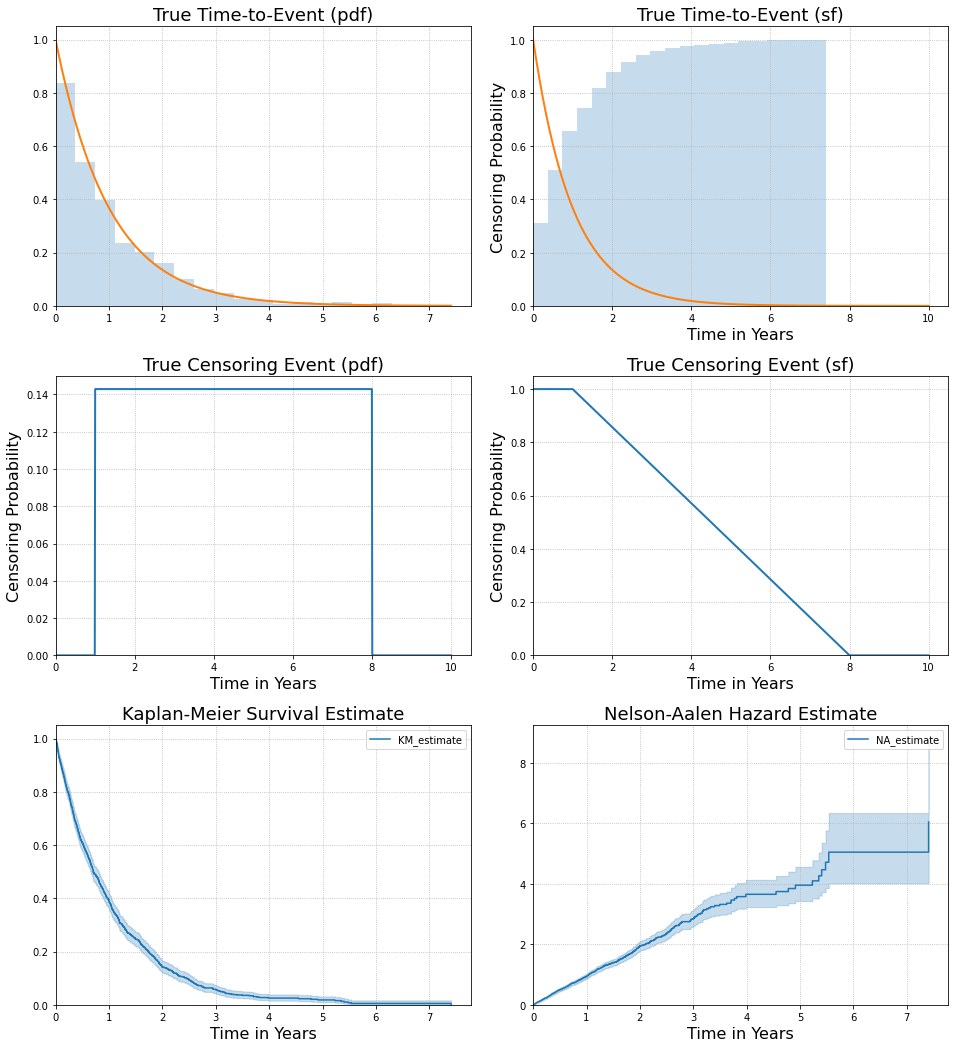

In [106]:
generate_data(n=1000, censoring_location=1.0, censoring_scale=6.)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


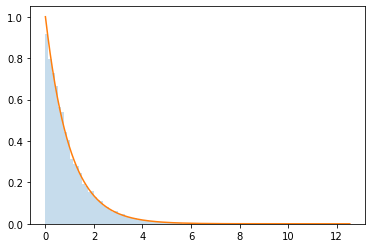

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


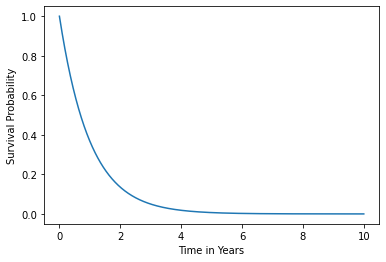

In [32]:
generate_data(n=10000)